# Data Exploration

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

The goal of this competition is to predict the price of the house. These values are stored in the variable `SalePrice`.

### Load the data

In [26]:
df_train = pd.read_csv('./_data/house-prices-advanced-regression-techniques/train.csv')

### Check the shape and data types

In [27]:

print(df_train.shape)
print(df_train.dtypes)

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


### Check for duplicates

In [28]:
# check for duplicates for Id
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsDupe = idsTotal - idsUnique
print(idsDupe)

0


## Exploring the Target Variable

In [29]:
# drop id col
df_train = df_train.drop(['Id'], axis=1)

In [30]:
# descriptive statistics
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

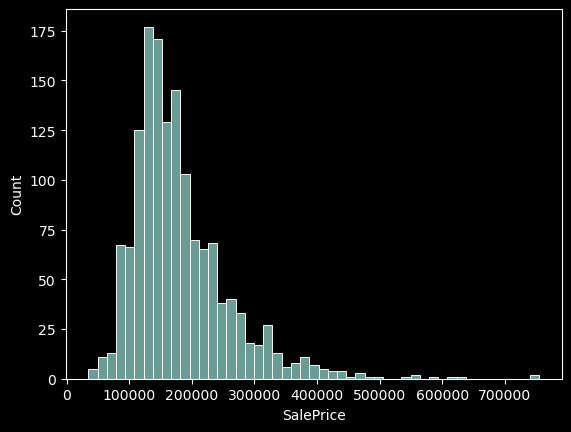

In [31]:
# histogram
sns.histplot(df_train['SalePrice'])

The graph indicates that the data deviates slightly from a normal distribution and it has many outliers.

## The Target Variable vs The Predictors

Domain knowledge:
- What variables are considered when purchasing a house?
- How important are these variables in relation to each other?
- Are these variables described in other variables?

In [32]:
sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

### Numerical Variables

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

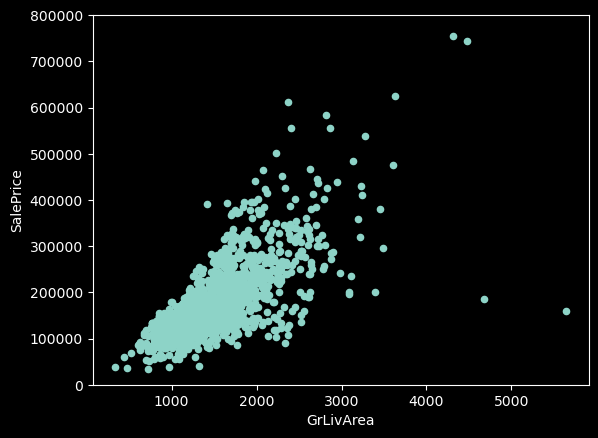

In [33]:
# scatter plot grlivearea vs. SalePrice
var = 'GrLivArea'
data = df_train[['SalePrice', var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

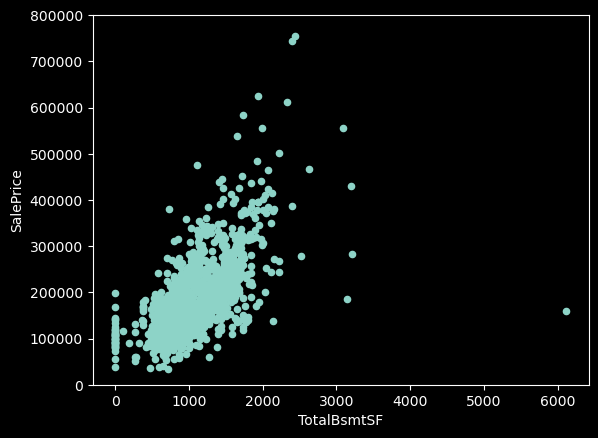

In [34]:
# scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = df_train[['SalePrice', var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

### Categorical Variables

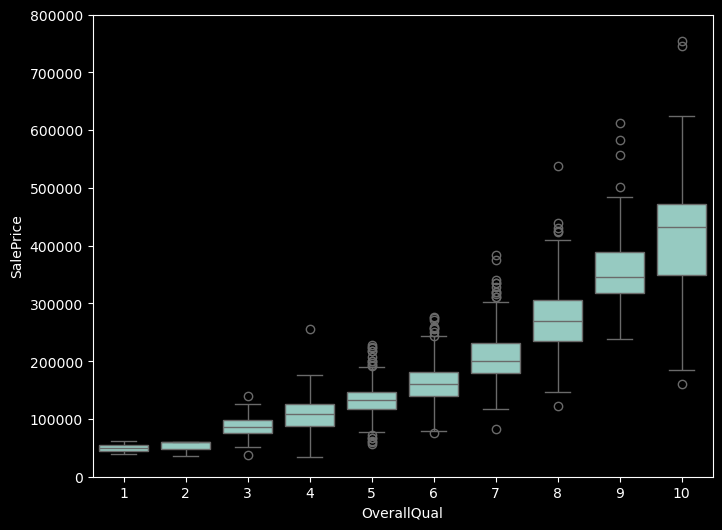

In [35]:
# overallqual
var = 'OverallQual'
data = df_train[['SalePrice', var]]
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

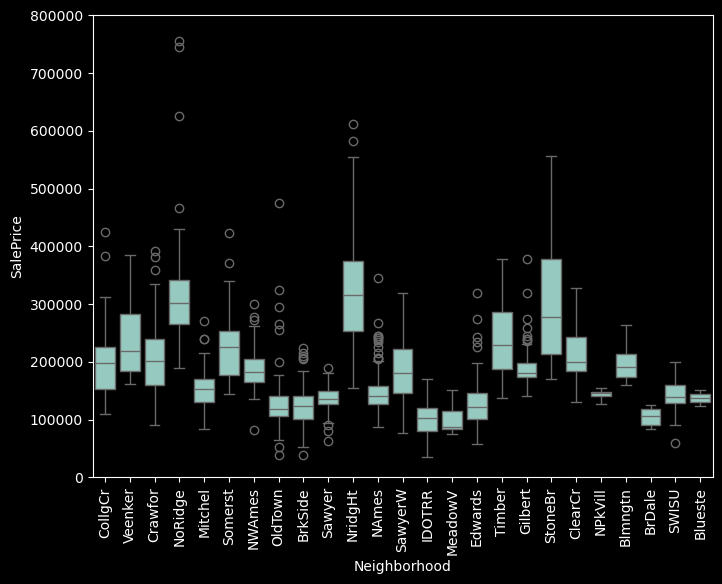

In [36]:
# neighbourhood
var = 'Neighborhood'
data = df_train[['SalePrice', var]]
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

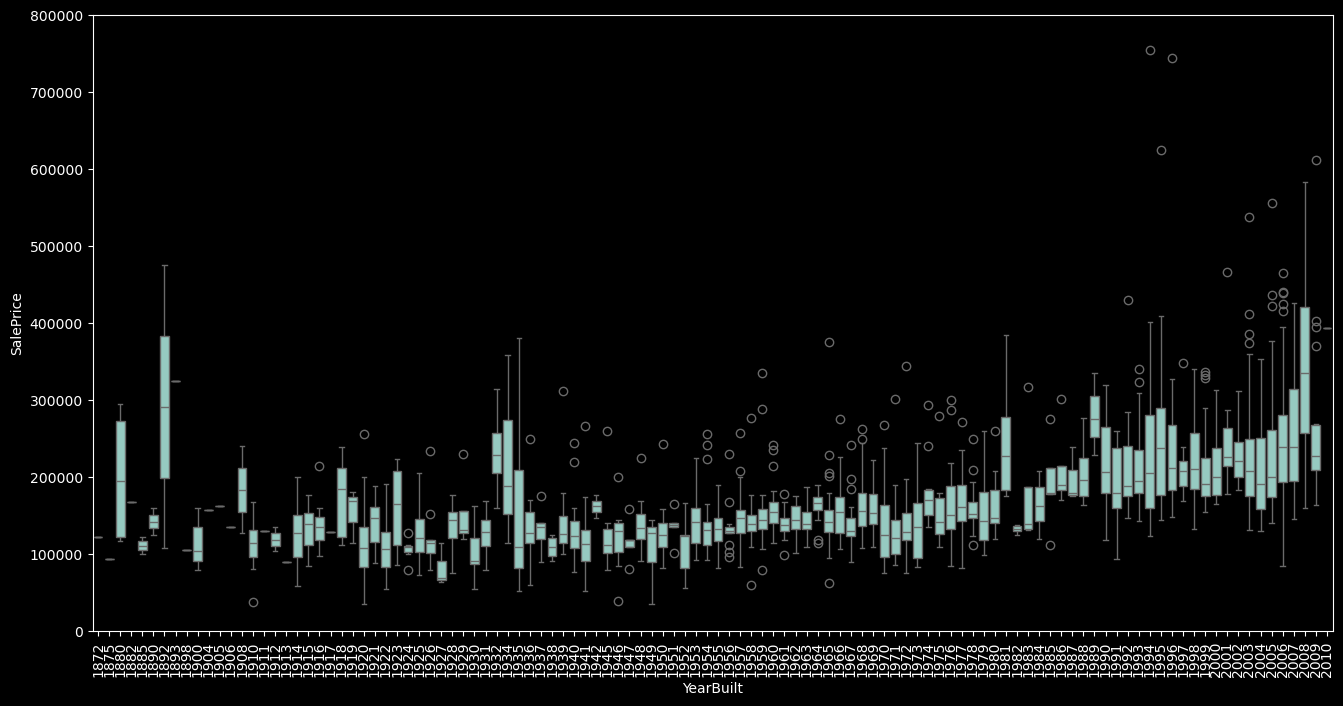

In [37]:
# YearBuilt
var = 'YearBuilt'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

### Multivariate Analysis

<Axes: >

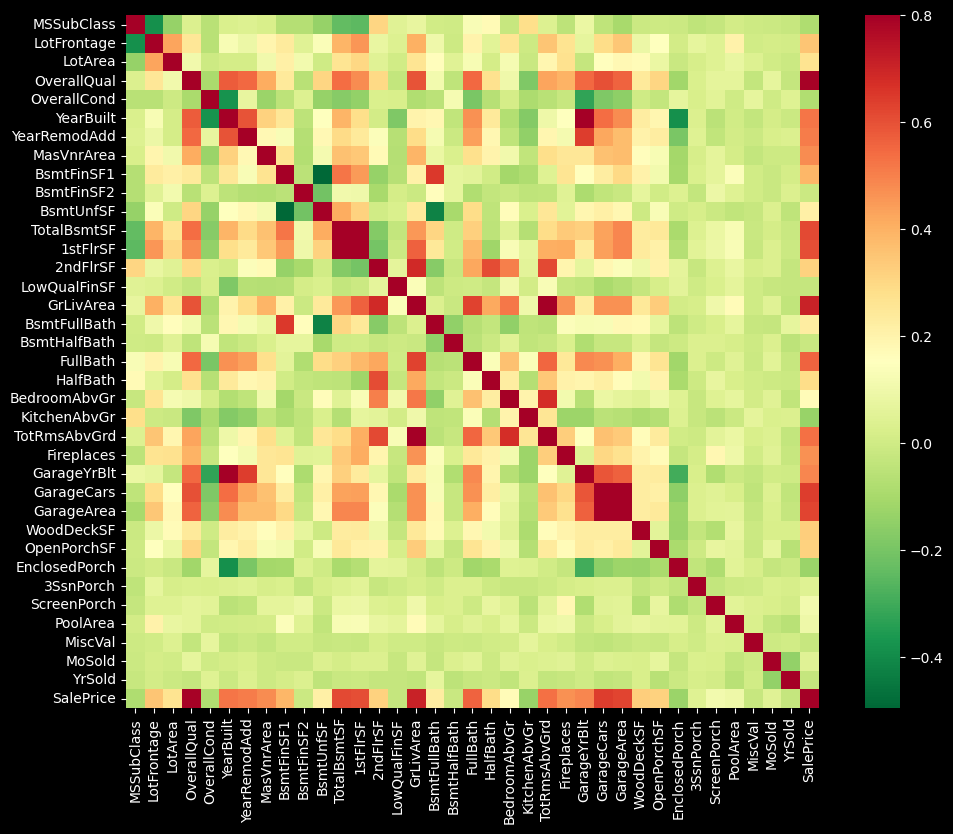

In [39]:
# correlation matrix
corrmat = df_train.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

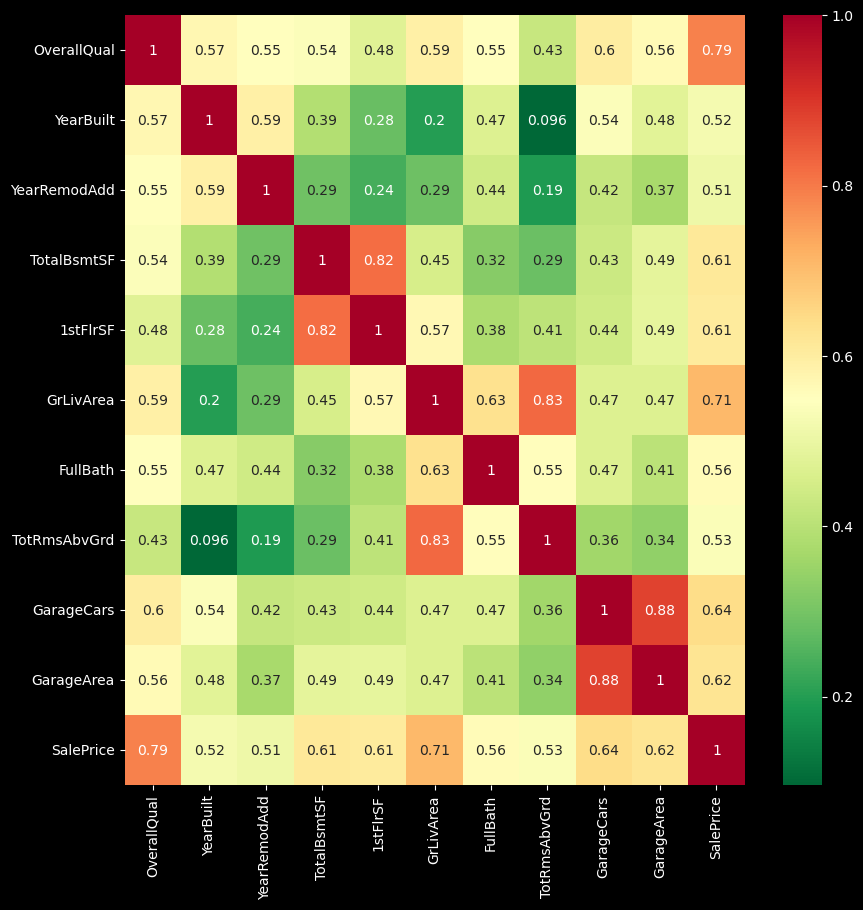

In [40]:
# most correlated features with SalePrice
corrmat = df_train.corr(numeric_only=True)
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")